In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns


In [5]:
df = pd.read_csv("C:/Users/Dell/Downloads/TShirt_size.csv")
# dataset source: https://www.kaggle.com/datasets/akalyasubramanian/dataset-for-knn-classification
df.head()

,Height (in cms),Weight (in kgs),T Shirt Size
0,158,58,M
1,158,59,M
2,158,63,M
3,160,59,M
4,160,60,M


In [7]:
# convert our target variable into numerical values so that our model can easily understand it using LabelEncoder
label_encoder = LabelEncoder()
df['T Shirt Size'] = label_encoder.fit_transform(df['T Shirt Size'])
df.head()


,Height (in cms),Weight (in kgs),T Shirt Size
0,158,58,1
1,158,59,1
2,158,63,1
3,160,59,1
4,160,60,1


In [9]:
X = df.drop(columns=['T Shirt Size'])
y = df['T Shirt Size']

# now, split the dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# KNN relies on distance, so we standardise the features that we have to avoid bias towards larger values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [16]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

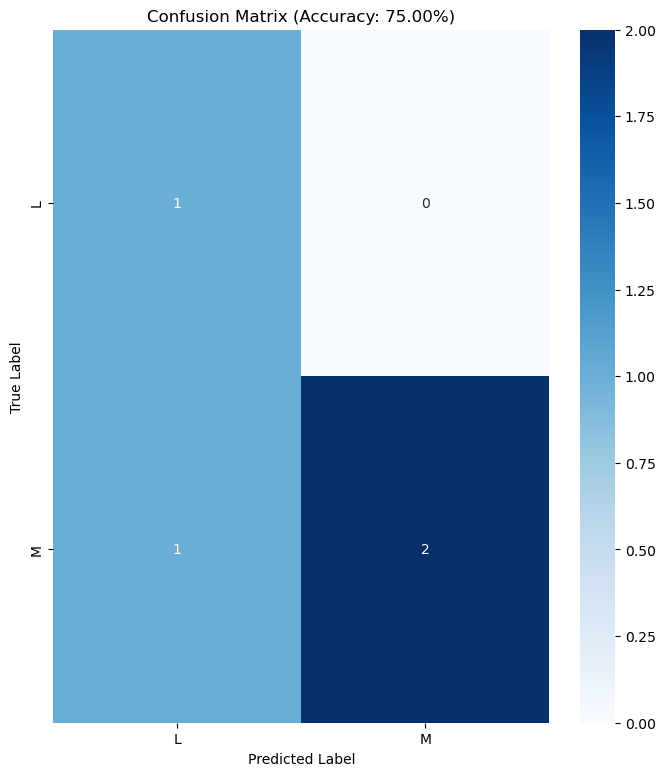

In [19]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,9))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix (Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%)")
plt.show()